In [ ]:
# If you are using Google Colab, you can mount your Google Drive to access your files.
# If you are using local machine, you can skip this step.
from google.colab import drive
drive.mount('/content/drive')

# **Week 5 Applied Session: Text Pre-processing**

This week, we focus on the basic techniques for the text data preprocessing. We will cover the following topics:

* 1. Basic Text Pre-Processing Technologies
* 2. Exploring Pre-Processed text and Generating Features
* 3. Practical example

## **1. Basic Text Pre-Processing Technologies**

The aim of this tutorial is to demonstrate the basic technologies used to pre-process text data in the text mining, Information Retrieval (IR) and Natural Language Processing (NLP) communities. Those technologies include
* Tokenizing text
* Removing stop words
* Stemming & Lemmatization
* Sentence segmentation

The ultimate goal of pre-processing text is to convert unstructured and free language text into structured data so that text analysis algorithms can directly take the structured data as input. For example, the UCI machine learning database provides free download of the bag-of-words datasets that contain ENRON emails, NIPS articles, the New York Times news articles, <a href="https://www.ncbi.nlm.nih.gov/pubmed">PubMed</a> articles. Those are the bench mark datasets used in text analysis. Lets have a look at one of the datasets, PubMed. The image below shows a screenshot of the first 15 lines in the data set

<img src="https://drive.google.com/uc?export=download&id=1U6IrUW8_HG-OEWPQc3dra20O6nnOFPI9">

The the three lines are the total number of PubMed abstracts, the vocabulary size, and the total number of work tokens in the datasets. Each abstract is stored in a sparse format that is often used in text analysis, where each row contains document ID, word index and the corresponding word count in the document. For example, "1 6811 1" means word 6811 appears in document 1 just once. To find the word string for "6811", you then go to the vocabulary and find the 6811th word. Now, how can we pre-process text data and save the processed data in the spare format.

Assume that we are going to analyze some medical reports that are about fungal disease. The goal of the analysis is to predict how likely a patient has fungal infection given some diagnostic report. The prediction can be formulated as a classification task where we are going to assign a binary label to a patient. 1 means the patient has fungal infection, and 0 means the patient does not. The text in the following cell contains a short diagnostic report for a patient. In this tutorial, you are going to learn the basic techniques often used in preprocessing text. In next tutorial, you will learn how to put these techniques together to count vocabulary and generate the final structure data.

Before we start, lets's prepare a text data for the example. The text data will be used to demonstrate the basic text pre-processing technologies in the following sections.

In [7]:
raw_text = """Previous right upper lobe nodule? Fungal question resolution change. Findings: Comparison is made to prior CT dated November 30, 2004. Significant resolution in the previously noted fluid overload status. Ectasia of the thoracic aorta measuring 4.2 cm. Features of generalised centrilobular emphysema. Resolution of right upper lobe nodule. There is now presence of a nodule within the medial segment of the right lower lobe which measures 5.4 mm and is non-specific in nature. Given the interval development of this fungal/inflammatory aetiology is likely. There is a 13 mm right axillary node which is a new finding since the prior study. No significant mediastinal or hilar adenopathy. Conclusion: Nodule in the right lower lobe in keeping with fungal/inflammatory aetiology."""
raw_text = raw_text.lower()
raw_text

'previous right upper lobe nodule? fungal question resolution change. findings: comparison is made to prior ct dated november 30, 2004. significant resolution in the previously noted fluid overload status. ectasia of the thoracic aorta measuring 4.2 cm. features of generalised centrilobular emphysema. resolution of right upper lobe nodule. there is now presence of a nodule within the medial segment of the right lower lobe which measures 5.4 mm and is non-specific in nature. given the interval development of this fungal/inflammatory aetiology is likely. there is a 13 mm right axillary node which is a new finding since the prior study. no significant mediastinal or hilar adenopathy. conclusion: nodule in the right lower lobe in keeping with fungal/inflammatory aetiology.'

### 1.1 Word Tokenization


Now, we need to think about how to break such a long sequence of characters into word tokens. The task of breaking a character sequence into pieces is known as tokenization. In the lecture, we have covered different tokenizers built in NLTK. For example, whitespace tokenizer, regular expression tokenizer and etc. You can find more information on the NLTK website, e.g.,
* <a href="http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize">tokenize module</a> in nltk.
* <a href="http://www.nltk.org/howto/tokenize.html">tokenize</a>: shows you how to use Treebank tokenizer and Regexp tokenizer

You can also refer to the Jupyter Notebook we provided. After tokenizing the <font color="brown">raw_text</font>, you should derive the following list of tokens
```
['previous', 'right', 'upper', 'lobe', 'nodule', 'fungal', 'question', 'resolution', 'change', 'findings', 'comparison', 'is', 'made', 'to', 'prior', 'ct', 'dated', 'november', '30', '2004', 'significant', 'resolution', 'in', 'the', 'previously', 'noted', 'fluid', 'overload', 'status', 'ectasia', 'of', 'the', 'thoracic', 'aorta', 'measuring', '4.2', 'cm', 'features', 'of', 'generalised', 'centrilobular', 'emphysema', 'resolution', 'of', 'right', 'upper', 'lobe', 'nodule', 'there', 'is', 'now', 'presence', 'of', 'a', 'nodule', 'within', 'the', 'medial', 'segment', 'of', 'the', 'right', 'lower', 'lobe', 'which', 'measures', '5.4', 'mm', 'and', 'is', 'non-specific', 'in', 'nature', 'given', 'the', 'interval', 'development', 'of', 'this', 'fungal', 'inflammatory', 'aetiology', 'is', 'likely', 'there', 'is', 'a', '13', 'mm', 'right', 'axillary', 'node', 'which', 'is', 'a', 'new', 'finding', 'since', 'the', 'prior', 'study', 'no', 'significant', 'mediastinal', 'or', 'hilar', 'adenopathy', 'conclusion', 'nodule', 'in', 'the', 'right', 'lower', 'lobe', 'in', 'keeping', 'with', 'fungal', 'inflammatory', 'aetiology']
```

`nltk.tokenize` is a module that provides a number of tokenizers. In this tutorial, we are going to use the `RegexpTokenizer` to tokenize the text. The `RegexpTokenizer` allows you to specify a regular expression to match the tokens. For example, the regular expression `r'\w+'` matches any word character. The following code shows how to use the `RegexpTokenizer` to tokenize the text.

In [8]:
from nltk.tokenize import RegexpTokenizer
### write your code with regular expression below
tokenizer = RegexpTokenizer(r"\w+(?:[-.]\w+)?")
unigram_tokens = tokenizer.tokenize(raw_text)
# print the tokens, every 10 tokens in a new line
for i in range(0, len(unigram_tokens), 10):
    print(unigram_tokens[i:i+10])

['previous', 'right', 'upper', 'lobe', 'nodule', 'fungal', 'question', 'resolution', 'change', 'findings']
['comparison', 'is', 'made', 'to', 'prior', 'ct', 'dated', 'november', '30', '2004']
['significant', 'resolution', 'in', 'the', 'previously', 'noted', 'fluid', 'overload', 'status', 'ectasia']
['of', 'the', 'thoracic', 'aorta', 'measuring', '4.2', 'cm', 'features', 'of', 'generalised']
['centrilobular', 'emphysema', 'resolution', 'of', 'right', 'upper', 'lobe', 'nodule', 'there', 'is']
['now', 'presence', 'of', 'a', 'nodule', 'within', 'the', 'medial', 'segment', 'of']
['the', 'right', 'lower', 'lobe', 'which', 'measures', '5.4', 'mm', 'and', 'is']
['non-specific', 'in', 'nature', 'given', 'the', 'interval', 'development', 'of', 'this', 'fungal']
['inflammatory', 'aetiology', 'is', 'likely', 'there', 'is', 'a', '13', 'mm', 'right']
['axillary', 'node', 'which', 'is', 'a', 'new', 'finding', 'since', 'the', 'prior']
['study', 'no', 'significant', 'mediastinal', 'or', 'hilar', 'adeno

The tokens are all unigrams. Except for "non-specific" that contains a hyphen and numbers, all the other tokens are single word tokens. As we know, phrases are more meaningful than single word, which makes us think that it would be good to tokenize a text so that phrases are kept as phrases. Then, the question is how can we merge multi-word expressions into single tokens. Assume that we are going to have the following multi-word expressions being treated as single tokens
* "<font color="red">generalised centrilobular emphysema</font>"
* "<font color="red">inflammatory aetiology</font>"
* "<font color="red">lobe nodule</font>"
* "<font color="red">axillary node</font>"
* "<font color="red">thoracic aorta measuring</font>"

In other words, you cannot split those phrases into individual words. It is lucky that NLTK provides us a <a href="http://www.nltk.org/_modules/nltk/tokenize/mwe.html#MWETokenizer">multi-word expression tokenizer</a>. The output should be
```
['previous', 'right', 'upper', 'lobe_nodule', 'fungal', 'question', 'resolution', 'change', 'findings', 'comparison', 'is', 'made', 'to', 'prior', 'ct', 'dated', 'november', '30', '2004', 'significant', 'resolution', 'in', 'the', 'previously', 'noted', 'fluid', 'overload', 'status', 'ectasia', 'of', 'the', 'thoracic_aorta_measuring', '4.2', 'cm', 'features', 'of', 'generalised_centrilobular_emphysema', 'resolution', 'of', 'right', 'upper', 'lobe_nodule', 'there', 'is', 'now', 'presence', 'of', 'a', 'nodule', 'within', 'the', 'medial', 'segment', 'of', 'the', 'right', 'lower', 'lobe', 'which', 'measures', '5.4', 'mm', 'and', 'is', 'non-specific', 'in', 'nature', 'given', 'the', 'interval', 'development', 'of', 'this', 'fungal', 'inflammatory_aetiology', 'is', 'likely', 'there', 'is', 'a', '13', 'mm', 'right', 'axillary_node', 'which', 'is', 'a', 'new', 'finding', 'since', 'the', 'prior', 'study', 'no', 'significant', 'mediastinal', 'or', 'hilar_adenopathy', 'conclusion', 'nodule', 'in', 'the', 'right', 'lower', 'lobe', 'in', 'keeping', 'with', 'fungal', 'inflammatory_aetiology']
```

Firstly, you should think about how to expand the list of unique words give by the unigram tokenizer above. In order to get a unique list of tokens (about 76 tokens in total), you can use <font color="blue">set</font> function, then convert the set to a list, and append the list with multi-word phrases.

In [9]:
### write your code below
tokens = ['Previous', 'right', 'upper', 'lobe', 'nodule', 'Fungal', 'question', 'resolution', 'change', 'Findings', 'Comparison', 'is', 'made', 'to', 'prior', 'CT', 'dated', 'November', '30', '2004', 'Significant', 'resolution', 'in', 'the', 'previously', 'noted', 'fluid', 'overload', 'status', 'Ectasia', 'of', 'the', 'thoracic', 'aorta', 'measuring', '4.2', 'cm', 'Features', 'of', 'generalised', 'centrilobular', 'emphysema', 'Resolution', 'of', 'right', 'upper', 'lobe', 'nodule', 'There', 'is', 'now', 'presence', 'of', 'a', 'nodule', 'within', 'the', 'medial', 'segment', 'of', 'the', 'right', 'lower', 'lobe', 'which', 'measures', '5.4', 'mmand', 'is', 'non-specific', 'in', 'nature', 'Given', 'the', 'interval', 'development', 'of', 'this', 'fungal', 'inflammatory', 'aetiology', 'is', 'likely', 'There', 'is', 'a', '13', 'mm', 'right', 'axillary', 'node', 'which', 'is', 'a', 'new', 'finding', 'since', 'the', 'prior', 'study', 'No', 'significant', 'mediastinal', 'or', 'hilar', 'adenopathy', 'Conclusion', 'Nodule', 'in', 'the', 'right', 'lower', 'lobe', 'in', 'keeping', 'with', 'fungal', 'inflammatory', 'aetiology']
# using the set() function to remove duplicates
uni_voc = list(set(unigram_tokens))
print(f"There are {len(uni_voc)} unique tokens in the unigram vocabulary.")
uni_voc.append(('generalised', 'centrilobular', 'emphysema'))
uni_voc.append(('inflammatory', 'aetiology'))
uni_voc.append(('hilar', 'adenopathy'))
uni_voc.append(('lobe', 'nodule'))
uni_voc.append(('axillary', 'node'))
uni_voc.append(('thoracic', 'aorta', 'measuring'))

There are 76 unique tokens in the unigram vocabulary.


Now we can have a look at the list of unique tokens.

In [10]:
# print the tokens, every 10 tokens in a new line
for i in range(0, len(uni_voc), 10):
    print(uni_voc[i:i+10])

['or', 'november', 'overload', 'significant', 'a', 'no', 'presence', 'prior', 'of', 'now']
['emphysema', '4.2', 'question', 'which', 'ectasia', 'inflammatory', 'is', 'noted', 'fluid', 'aorta']
['within', 'mm', 'change', 'interval', 'comparison', 'likely', 'mediastinal', 'features', 'aetiology', 'new']
['non-specific', 'fungal', 'previously', 'to', 'finding', 'resolution', 'measures', 'keeping', 'status', 'and']
['lobe', 'this', '2004', '5.4', 'the', 'right', 'nodule', 'dated', 'nature', 'lower']
['made', 'given', 'cm', 'development', 'hilar', 'ct', 'there', 'node', 'medial', 'study']
['since', 'centrilobular', 'adenopathy', 'previous', 'measuring', 'upper', 'in', 'conclusion', 'with', 'generalised']
['findings', 'thoracic', 'segment', '13', 'axillary', '30', ('generalised', 'centrilobular', 'emphysema'), ('inflammatory', 'aetiology'), ('hilar', 'adenopathy'), ('lobe', 'nodule')]
[('axillary', 'node'), ('thoracic', 'aorta', 'measuring')]


`MWETokenizer` is a multi-word expression tokenizer that allows you to specify a list of multi-word expressions.
Now, we can use the `MWETokenizer` to tokenize the <font color="brown">unigram_tokens</font> from raw_text. The following code shows how to use the `MWETokenizer` to tokenize the text.

In [11]:
from nltk.tokenize import MWETokenizer
### write your code below
mwe_tokenizer = MWETokenizer(uni_voc)
mwe_tokens = mwe_tokenizer.tokenize(unigram_tokens)
# print the tokens, every 10 tokens in a new line
for i in range(0, len(mwe_tokens), 10):
    print(mwe_tokens[i:i+10])

['previous', 'right', 'upper', 'lobe_nodule', 'fungal', 'question', 'resolution', 'change', 'findings', 'comparison']
['is', 'made', 'to', 'prior', 'ct', 'dated', 'november', '30', '2004', 'significant']
['resolution', 'in', 'the', 'previously', 'noted', 'fluid', 'overload', 'status', 'ectasia', 'of']
['the', 'thoracic_aorta_measuring', '4.2', 'cm', 'features', 'of', 'generalised_centrilobular_emphysema', 'resolution', 'of', 'right']
['upper', 'lobe_nodule', 'there', 'is', 'now', 'presence', 'of', 'a', 'nodule', 'within']
['the', 'medial', 'segment', 'of', 'the', 'right', 'lower', 'lobe', 'which', 'measures']
['5.4', 'mm', 'and', 'is', 'non-specific', 'in', 'nature', 'given', 'the', 'interval']
['development', 'of', 'this', 'fungal', 'inflammatory_aetiology', 'is', 'likely', 'there', 'is', 'a']
['13', 'mm', 'right', 'axillary_node', 'which', 'is', 'a', 'new', 'finding', 'since']
['the', 'prior', 'study', 'no', 'significant', 'mediastinal', 'or', 'hilar_adenopathy', 'conclusion', 'nodul

From above we can see that the <font color='brown'>raw_text</font> has been split into a list of tokens that contains both unigrams and multi-word expressions. However, the list contains a lot of functional words, such as "to", "in", "the", "is" and so on. These functional words usually do not contribute much to the semantics of the text, except for increase the dimensionality of the data in text analysis. Also, note that our goal is to build a classification model of predicting fungal disease. Thus, we are more interested in the meaning of the diagnostic report than the syntax. Therefore, we can choose to remove those words, which is your next task.

You can also have try the different tokenizer on line at http://text-processing.com/demo/tokenize/.

### 1.2 Removing Stop Words

As we have discussed in the lecture and in the Jupyter Notebook, stop words carry little lexical content. They are often functional words in English, for example, articles, pronouns, particles, and so on. In NLP and IR, we usually exclude stop words from the vocabulary. Otherwise, we will face the curse of dimensionality. There are some exceptions, such as syntactic analysis like parsing, we choose to keep those functional words. However, you are going to remove all the stop words in the above list by using the stop word list in `NLTK`, which is

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

`nltk.corpus` is a module that provides a number of corpora, including the stop words list. The following code shows how to use the `stopwords` corpus to remove stop words from the list of tokens.

In [13]:
from nltk.corpus import stopwords
# get the list of stopwords
stopwords_list = stopwords.words('english')
# print the stopwords, every 15 stopwords in a new line
for i in range(0, len(stopwords_list), 15):
    print(stopwords_list[i:i+15])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't"]
['as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't"]
['d', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few']
['for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd"]
["he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm"]
['in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm']
['ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not']
['now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own']
['re', 's', 'same', 'shan', "shan'

Now, it is your turn to remove all the stop words from the output of your <b>MWEtokenizer</b>. While writing the list comprehension code, you should think about the difference between <font color="blue">list</font> and <font color="blue">set</font>. Sets are significantly faster when your task is to determine if an object is present in the set, but are slower than lists when you try to iterate over the elements. The list of tokens after stop words be removed should be

`['previous', 'right', 'upper', 'lobe_nodule', 'fungal', 'question', 'resolution', 'change', 'findings', 'comparison', 'made', 'prior', 'ct', 'dated', 'november', '30', '2004', 'significant', 'resolution', 'previously', 'noted', 'fluid', 'overload', 'status', 'ectasia', 'thoracic_aorta_measuring', '4.2', 'cm', 'features', 'generalised_centrilobular_emphysema', 'resolution', 'right', 'upper', 'lobe_nodule', 'presence', 'nodule', 'within', 'medial', 'segment', 'right', 'lower', 'lobe', 'measures', '5.4', 'mm', 'non-specific', 'nature', 'given', 'interval', 'development', 'fungal', 'inflammatory_aetiology', 'likely', '13', 'mm', 'right', 'axillary_node', 'new', 'finding', 'since', 'prior', 'study', 'significant', 'mediastinal', 'hilar_adenopathy', 'conclusion', 'nodule', 'right', 'lower', 'lobe', 'keeping', 'fungal', 'inflammatory_aetiology']`

In [14]:
# get the set of stopwords
stopwords_set = set(stopwords_list)
# remove the stopwords from the mwe_tokens
stopped_tokens = [w for w in mwe_tokens if w not in stopwords_set]
# print the tokens, every 15 tokens in a new line
for i in range(0, len(stopped_tokens), 15):
    print(stopped_tokens[i:i+15])

['previous', 'right', 'upper', 'lobe_nodule', 'fungal', 'question', 'resolution', 'change', 'findings', 'comparison', 'made', 'prior', 'ct', 'dated', 'november']
['30', '2004', 'significant', 'resolution', 'previously', 'noted', 'fluid', 'overload', 'status', 'ectasia', 'thoracic_aorta_measuring', '4.2', 'cm', 'features', 'generalised_centrilobular_emphysema']
['resolution', 'right', 'upper', 'lobe_nodule', 'presence', 'nodule', 'within', 'medial', 'segment', 'right', 'lower', 'lobe', 'measures', '5.4', 'mm']
['non-specific', 'nature', 'given', 'interval', 'development', 'fungal', 'inflammatory_aetiology', 'likely', '13', 'mm', 'right', 'axillary_node', 'new', 'finding', 'since']
['prior', 'study', 'significant', 'mediastinal', 'hilar_adenopathy', 'conclusion', 'nodule', 'right', 'lower', 'lobe', 'keeping', 'fungal', 'inflammatory_aetiology']


In [15]:
# compare the difference between mwe_tokens and stopped_tokens
print(f"The number of tokens before removing stopwords is {len(mwe_tokens)}")
print(f"The number of tokens after removing stopwords is {len(stopped_tokens)}")
diff_tokens = set(mwe_tokens) - set(stopped_tokens)
print(f"The different tokens are {diff_tokens}")

The number of tokens before removing stopwords is 110
The number of tokens after removing stopwords is 73
The different tokens are {'or', 'and', 'a', 'no', 'this', 'the', 'in', 'now', 'of', 'which', 'to', 'with', 'is', 'there'}


Of course, you can use a rich stopword list, as the one used in the lecture. You can also expand the stopword list by adding corpus specific stop words, for example those more frequent words. By more frequent, we meant that the words appear in every document, they do not help us distinguish documents. For example, the following words do appear in each diagnostic report. (In next tutorial, we will demonstrate how to use basic statistics to identify them.)
* <font color="red">ct</font>
* <font color="red">mm</font>
* <font color="red">cm</font>
* <font color="red">fungal</font>
* <font color="red">conclusion</font>

You task is to expand the stopword list with the four words, and process the list of tokens again. The output should be
```
['previous', 'right', 'upper', 'lobe_nodule', 'question', 'resolution', 'change', 'findings', 'comparison', 'made', 'prior', 'dated', 'november', '30', '2004', 'significant', 'resolution', 'previously', 'noted', 'fluid', 'overload', 'status', 'ectasia', 'thoracic_aorta_measuring', '4.2', 'features', 'generalised_centrilobular_emphysema', 'resolution', 'right', 'upper', 'lobe_nodule', 'presence', 'nodule', 'within', 'medial', 'segment', 'right', 'lower', 'lobe', 'measures', '5.4', 'non-specific', 'nature', 'given', 'interval', 'development', 'inflammatory_aetiology', 'likely', '13', 'right', 'axillary_node', 'new', 'finding', 'since', 'prior', 'study', 'significant', 'mediastinal', 'hilar_adenopathy', 'nodule', 'right', 'lower', 'lobe', 'keeping', 'inflammatory_aetiology']
```

In [16]:
# add the following words to the stopwords set
stopwords_set.add('ct')
stopwords_set.add('mm')
stopwords_set.add('cm')
stopwords_set.add('fungal')
stopwords_set.add('conclusion')
stopped_tokens = [w for w in mwe_tokens if w not in stopwords_set]
print(f"The number of tokens after adding new stopwords is {len(stopped_tokens)}")
# print the tokens, every 10 tokens in a new line
for i in range(0, len(set(stopped_tokens)), 10):
    print(list(set(stopped_tokens))[i:i+10])

The number of tokens after adding new stopwords is 65
['november', 'overload', 'significant', 'presence', 'prior', 'finding', '4.2', 'question', 'ectasia', 'study']
['noted', 'fluid', 'interval', 'within', 'mediastinal', 'change', 'axillary_node', 'comparison', 'likely', 'hilar_adenopathy']
['features', 'new', 'non-specific', 'lobe_nodule', 'previously', 'thoracic_aorta_measuring', 'resolution', 'measures', 'keeping', 'status']
['lobe', '2004', '5.4', 'inflammatory_aetiology', 'right', 'nodule', 'dated', 'nature', 'lower', 'made']
['given', 'development', 'medial', 'since', 'previous', 'upper', 'findings', 'segment', '13', '30']
['generalised_centrilobular_emphysema']


Again, we should inspect the output, which is a very good practice in data preprocessing. You will find that we have words like "find" and "findings", "previous" and "previously", "noted", etc. Should we keep them as they are? or Should we reduce them to the base form?

### 1.3 Stemming, Lemmatization, setence segmentation and POS tagging

The task of stemming and lemmatization is to reduce the same word in different lexical forms to its base form in the lexicon without significantly loosing the meaning (a.k.a. word normalisation). In English, nouns are inflected in the plural, verbs are inflected in the various tenses, and adjectives are inflected in the comparative/superlative. In morphology, the derivation process creates a new word out of an existing one often by adding either a prefix or a suffix. In this exercise, you are going to apply the <b>PorterStemmer</b> and <b>WordNetLemmatizer</b> provided in the NLTK's <a href="http://www.nltk.org/api/nltk.stem.html">stem</a> package to perform this task.

Note that the <b>stemming</b> and the <b>lemmatization</b> can serve as alternative methods for word normalisation.


- `Stemming` involves removing suffixes or prefixes from words to obtain their root or base form, irrespective of the word's context or meaning. This results in words that may not be actual words in the language but are linguistically related. For example, the word "running" would be stemmed to "run," but "runs" and "ran" would also be stemmed to "run."
- `Lemmatization` takes into account the context and meaning of words, mapping them to their dictionary form or lemma. This process considers factors such as part of speech and grammatical rules, ensuring that the resulting word is a valid word in the language. For instance, "ran" would be lemmatized to "run," and "better" would be lemmatized to "good." Therefore, the sentence-level structure need to be kept in order to considering the context and meaning of the words.

#### 1.3.1 Stemming
Normally, stemming process happens after stop word removal. However, it depends on the text analysis tasks and the context. If you need to remove the stop words after stemming, you need to stem the stop words as well.

`nltk.stem` is a module that provides a number of stemmers. In this tutorial, we are going to use the `PorterStemmer` to stem the list of tokens.

In [17]:
from nltk.stem import PorterStemmer
# create an instance of the PorterStemmer
stemmer = PorterStemmer()

In [18]:
final_tokens_stemmed = []
for token in stopped_tokens:
    final_tokens_stemmed = final_tokens_stemmed + [stemmer.stem(token)]
# print the tokens, every 10 tokens in a new line
for i in range(0, len(final_tokens_stemmed), 10):
    print(final_tokens_stemmed[i:i+10])

['previou', 'right', 'upper', 'lobe_nodul', 'question', 'resolut', 'chang', 'find', 'comparison', 'made']
['prior', 'date', 'novemb', '30', '2004', 'signific', 'resolut', 'previous', 'note', 'fluid']
['overload', 'statu', 'ectasia', 'thoracic_aorta_measur', '4.2', 'featur', 'generalised_centrilobular_emphysema', 'resolut', 'right', 'upper']
['lobe_nodul', 'presenc', 'nodul', 'within', 'medial', 'segment', 'right', 'lower', 'lobe', 'measur']
['5.4', 'non-specif', 'natur', 'given', 'interv', 'develop', 'inflammatory_aetiolog', 'like', '13', 'right']
['axillary_nod', 'new', 'find', 'sinc', 'prior', 'studi', 'signific', 'mediastin', 'hilar_adenopathi', 'nodul']
['right', 'lower', 'lobe', 'keep', 'inflammatory_aetiolog']


In [19]:
print(f"The number of tokens before stemming is {len(set(stopped_tokens))}")
print(f"The number of tokens after stemming is {len(set(final_tokens_stemmed))}")

The number of tokens before stemming is 51
The number of tokens after stemming is 50


<span style='color:red'>Whats the difference before and after stemming?</span>

#### 1.3.2 Sentence Segmentation

`Lemmatization`, unlike stemming, it operates on sentence level, necessitating prior steps such as sentence segmentation and part-of-speech (POS) tagging to provide the necessary linguistic context. By leveraging this linguistic information, lemmatization ensures that words are transformed to their correct dictionary form, accounting for variations in inflection and tense.

Note that the <b>WordNetLemmatizer</b> can take the POS tag of each word as one argument, specifying which can give us more accurate base form of the word.

Therefore, first you should carry out sentence segmentation. You code should produce
```
previous right upper lobe nodule?
fungal question resolution change.
findings: comparison is made to prior ct dated november 30, 2004. significant resolution in the previously noted fluid overload status.
ectasia of the thoracic aorta measuring 4.2 cm.
features of generalised centrilobular emphysema.
resolution of right upper lobe nodule.
there is now presence of a nodule within the medial segment of the right lower lobe which measures 5.4 mm and is non-specific in nature.
given the interval development of this fungal/inflammatory aetiology is likely.
there is a 13 mm right axillary node which is a new finding since the prior study.
no significant mediastinal or hilar adenopathy.
conclusion: nodule in the right lower lobe in keeping with fungal/inflammatory aetiology.
```

In order to segment the given text into sentences, you can refer to the Jupyter Notebook (chapter 1) or search "<b>Punkt Sentence Tokenizer</a>" on the http://www.nltk.org/api/nltk.tokenize.html

In [20]:
# nltk.download('punkt')
# package name changed to punkt_tab

In [21]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
import nltk.data
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
### write your code below
sentences = sent_detector.tokenize(raw_text.strip())
for sent in sentences:
    print (sent)

previous right upper lobe nodule?
fungal question resolution change.
findings: comparison is made to prior ct dated november 30, 2004. significant resolution in the previously noted fluid overload status.
ectasia of the thoracic aorta measuring 4.2 cm.
features of generalised centrilobular emphysema.
resolution of right upper lobe nodule.
there is now presence of a nodule within the medial segment of the right lower lobe which measures 5.4 mm and is non-specific in nature.
given the interval development of this fungal/inflammatory aetiology is likely.
there is a 13 mm right axillary node which is a new finding since the prior study.
no significant mediastinal or hilar adenopathy.
conclusion: nodule in the right lower lobe in keeping with fungal/inflammatory aetiology.


#### 1.3.3 POS Tagging

Then, we will use the POS tagger to assign POS tag to each word in each sentence. Please refer to Section 1 of http://www.nltk.org/book/ch05.html. The step you are going to use is:

For each sentence
1. use the unigram tokenizer you developed in Exercise 1 to tokenize the sentence
2. use the <b>MWETokenizer</b> used in Exercise 1 to tokenize the sentence with multi-word expressions
3. use the information in Section 1 of http://www.nltk.org/book/ch05.html to help you finish the POS tagging.
4. remove the stop words in each sentence

Finally save the tagged sentences in a list. The output you will derive should be
```
[[('previous', 'JJ'), ('right', 'JJ'), ('upper', 'NN'), ('lobe_nodule', 'NN')], [('question', 'NN'), ('resolution', 'NN'), ('change', 'NN')], [('findings', 'NNS'), ('comparison', 'NN'), ('made', 'VBN'), ('prior', 'VB'), ('dated', 'JJ'), ('november', 'RB'), ('30', 'CD'), ('2004', 'CD'), ('significant', 'JJ'), ('resolution', 'NN'), ('previously', 'RB'), ('noted', 'VBN'), ('fluid', 'NN'), ('overload', 'NN'), ('status', 'NN')], [('ectasia', 'NN'), ('thoracic_aorta_measuring', 'VBG'), ('4.2', 'CD')], [('features', 'NNS'), ('generalised_centrilobular_emphysema', 'NN')], [('resolution', 'NN'), ('right', 'JJ'), ('upper', 'JJ'), ('lobe_nodule', 'NN')], [('presence', 'NN'), ('nodule', 'NN'), ('within', 'IN'), ('medial', 'JJ'), ('segment', 'NN'), ('right', 'JJ'), ('lower', 'JJR'), ('lobe', 'NN'), ('measures', 'VBZ'), ('5.4', 'CD'), ('non-specific', 'JJ'), ('nature', 'NN')], [('given', 'VBN'), ('interval', 'NN'), ('development', 'NN'), ('inflammatory_aetiology', 'NN'), ('likely', 'JJ')], [('13', 'CD'), ('right', 'NN'), ('axillary_node', 'NN'), ('new', 'JJ'), ('finding', 'NN'), ('since', 'IN'), ('prior', 'JJ'), ('study', 'NN')], [('significant', 'JJ'), ('mediastinal', 'NN'), ('hilar_adenopathy', 'NN')], [('nodule', 'NN'), ('right', 'NN'), ('lower', 'JJR'), ('lobe', 'NN'), ('keeping', 'VBG'), ('inflammatory_aetiology', 'NN')]]
```
Now, your task is to fill the for loop below by following the steps above. If you would like to know the meaning of each tag, you can type for example
```
print(nltk.help.upenn_tagset('NNP'))
```
Replacing "NNP" with the tag you want, you should see the explanation.

`nltk.download('tagsets')` is a module that provides a number of tagsets. In this tutorial, we are going to use the `upenn_tagset` to get the meaning of each tag.

In [24]:
# nltk.download('tagsets')
# package name changed to tagsets_json

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [23]:
nltk.download('tagsets_json')

[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.


True

`nltk.help.upenn_tagset('NNP')` will show you the explanation of the tag "NNP".

In [24]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


`nltk.download('averaged_perceptron_tagger')` is a module that provides a number of taggers. In this tutorial, we are going to use the `averaged_perceptron_tagger` to tag the list of tokens.

In [27]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

Now we can have a look at the tagged sentences.

In [28]:
tagged_sents = []
for sent in sentences:
    # tokenize the sentence
    uni_sent = tokenizer.tokenize(sent)
    mwe_text = mwe_tokenizer.tokenize(uni_sent)
    tagged_sent = nltk.tag.pos_tag(mwe_text)
    stopped_tagged_sent = [x for x in tagged_sent if x[0] not in stopwords_set]
    tagged_sents.append(stopped_tagged_sent)
# print the tagged sentences
for sent in tagged_sents:
    print(sent)

[('previous', 'JJ'), ('right', 'JJ'), ('upper', 'NN'), ('lobe_nodule', 'NN')]
[('question', 'NN'), ('resolution', 'NN'), ('change', 'NN')]
[('findings', 'NNS'), ('comparison', 'NN'), ('made', 'VBN'), ('prior', 'VB'), ('dated', 'JJ'), ('november', 'RB'), ('30', 'CD'), ('2004', 'CD'), ('significant', 'JJ'), ('resolution', 'NN'), ('previously', 'RB'), ('noted', 'VBN'), ('fluid', 'NN'), ('overload', 'NN'), ('status', 'NN')]
[('ectasia', 'NN'), ('thoracic_aorta_measuring', 'VBG'), ('4.2', 'CD')]
[('features', 'NNS'), ('generalised_centrilobular_emphysema', 'NN')]
[('resolution', 'NN'), ('right', 'JJ'), ('upper', 'JJ'), ('lobe_nodule', 'NN')]
[('presence', 'NN'), ('nodule', 'NN'), ('within', 'IN'), ('medial', 'JJ'), ('segment', 'NN'), ('right', 'JJ'), ('lower', 'JJR'), ('lobe', 'NN'), ('measures', 'VBZ'), ('5.4', 'CD'), ('non-specific', 'JJ'), ('nature', 'NN')]
[('given', 'VBN'), ('interval', 'NN'), ('development', 'NN'), ('inflammatory_aetiology', 'NN'), ('likely', 'JJ')]
[('13', 'CD'), ('r

#### 1.3.4 Lemmatization

The last step is to apply the <b>WordNetLemmatizer</b>. You code should make use the POS tags of each word to decide the lexical base form. The <font color="blue">lemmatize</font> function in <b>WordNetLemmatizer</b> can accept the following wordnet tags
* wordnet.ADJ
* wordnet.VERB
* wordnet.NOUN
* wordnet.ADV

The function of converting POS tags to wordnet tags is given bellow. In you code, you should think about how to call the function.

In [29]:
#
# The code in this cell is adapted from the following website
# http://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python
#
from nltk.corpus import wordnet
# get the WordNet POS tag
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

`nltk.download('wordnet')` is a module that provides a number of stemmers. In this tutorial, we are going to use the `WordNetLemmatizer` to lemmatize the list of tokens.

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [31]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
final_tokens =[]
### write your code below
for tagged_set in tagged_sents:
    final_tokens = final_tokens + [lemmatizer.lemmatize(w[0], get_wordnet_pos(w[1])) for w in tagged_set ]

You can compare the difference between the tokenization with and without lemmatization. For example, if the list of tokens generated in Exercise 2 is "stopped_tokens", then you can use the following code to see the difference
```python
set(final_tokens) - set(stopped_tokens)
```
```python
set(stopped_tokens) - set(final_tokens)
```

To use the stemmers discussed in the lecture, you can simply replace the following code in the above code cell
```python
    lemmatizer = WordNetLemmatizer()
```
with
```python
    stemmer = PorterStemmer()
```
and replance
```python
    lemmatizer.lemmatize(w[0], get_wordnet_pos(w[1]))
```
with
```python
    stemmer.stem(w[0])
```
Don't forget import the corresponding modules.

Note that we have not yet done the preprocessing. Next tutorial, we will learn how to count the vocabulary by further removing the most and less frequent words, to generate numberical represenation of a document, etc.

In [32]:
# print the final_tokens, every 10 tokens in a new line
for i in range(0, len(final_tokens), 10):
    print(final_tokens[i:i+10])

['previous', 'right', 'upper', 'lobe_nodule', 'question', 'resolution', 'change', 'finding', 'comparison', 'make']
['prior', 'dated', 'november', '30', '2004', 'significant', 'resolution', 'previously', 'note', 'fluid']
['overload', 'status', 'ectasia', 'thoracic_aorta_measuring', '4.2', 'feature', 'generalised_centrilobular_emphysema', 'resolution', 'right', 'upper']
['lobe_nodule', 'presence', 'nodule', 'within', 'medial', 'segment', 'right', 'low', 'lobe', 'measure']
['5.4', 'non-specific', 'nature', 'give', 'interval', 'development', 'inflammatory_aetiology', 'likely', '13', 'right']
['axillary_node', 'new', 'finding', 'since', 'prior', 'study', 'significant', 'mediastinal', 'hilar_adenopathy', 'nodule']
['right', 'low', 'lobe', 'keep', 'inflammatory_aetiology']


In [33]:
# print stopped_tokens, every 10 tokens in a new line
for i in range(0, len(stopped_tokens), 10):
    print(stopped_tokens[i:i+10])

['previous', 'right', 'upper', 'lobe_nodule', 'question', 'resolution', 'change', 'findings', 'comparison', 'made']
['prior', 'dated', 'november', '30', '2004', 'significant', 'resolution', 'previously', 'noted', 'fluid']
['overload', 'status', 'ectasia', 'thoracic_aorta_measuring', '4.2', 'features', 'generalised_centrilobular_emphysema', 'resolution', 'right', 'upper']
['lobe_nodule', 'presence', 'nodule', 'within', 'medial', 'segment', 'right', 'lower', 'lobe', 'measures']
['5.4', 'non-specific', 'nature', 'given', 'interval', 'development', 'inflammatory_aetiology', 'likely', '13', 'right']
['axillary_node', 'new', 'finding', 'since', 'prior', 'study', 'significant', 'mediastinal', 'hilar_adenopathy', 'nodule']
['right', 'lower', 'lobe', 'keeping', 'inflammatory_aetiology']


Now, we have pre-processed the text data. The next step is to explore the pre-processed text data and generate features. In this tutorial, we are going to demonstrate how to count the vocabulary and generate the sparse format data. The sparse format data is often used in text analysis, where each row contains document ID, word index and the corresponding word count in the document. This practice will help you understand the basic text analysis technologies and the data structure used in text analysis.

In the next Section, we are going to explore the pre-processed text data and generate features.

## **2. Exploring Pre-Processed text and Generating Features**

One of the challenges of text analysis is to convert unstructured and semi-structured text into a structured representation. This must be done prior to carrying out any text analysis tasks. This chapter will show you
how to put some of those basic steps discussed in the previous chapter together to generate different vector
representations for some given text. You will learn how to compute some basic statistics for text, and how to extract features rather than unigrams.

### 2.1. Counting Vocabulary by Selecting Tokens of Interest

Two important concepts that should be mentioned first are **type** and **token**.
Here are the definitions of the two terms, quoted from "[tokenization](http://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html)",  
>a **token** is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing;

> a **type** is the class of all tokens containing the same character sequence.

A *type* is also a vocabulary entry. In other words, a vocabulary consists of a number of word types.
The distinction between a type and its tokens is a distinction that separates a descriptive concept from
its particular concrete instances.
This is quite similar to the distinction in object-oriented programming between classes and objects.
In this section, you are going to learn how to count types in a given corpus by further processing the text.

The document collection that we are going to use is a set of Reuters articles that comes with NLTK.
It contains 10788 Reuters articles in total and has been split into two subsets, training and testing.
Although this collection has already been pre-processed (e.g., you can access the text at different levels, like raw text, tokens, and sentences),
we would still like to demonstrate how to put some of the basis text preprocessing steps together and process the raw Reuters articles step by step.
First, import the main Python libraries.

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

`nltk.download('reuters')` is a module that provides a number of corpora, including the Reuters corpus. The following code shows how to use the `reuters` corpus to load the Reuters articles.

In [35]:
import nltk
nltk.download('reuters')
from nltk.corpus import reuters

[nltk_data] Downloading package reuters to /root/nltk_data...


Since the tokenizer works on a per document level, we can parallelize the process of tokenization with Python's multi-processing module. Please refer to its official documentation [here](https://docs.python.org/2/library/multiprocessing.html).
In the following code, we wrap tokenization in a Python function, and then
create a pool of four worker processes with the Python Pool class.
The <font color="blue">`Pool.map()`</font>, a parallel equivalent of the  built-in  <font color="blue">`map()`</font> function, takes one iterable argument.
The iterable will be split into a number of chunks, each of which will be submitted to a process in the process pool.
Each process will apply a callable function to each element in the chunk it has received.
Note that you can replace the NLTK tokenizer with the one you implement.

In [36]:
def tokenizeRawData(fileid):
    """
        This function tokenizes a raw text document.
    """
    raw_article = reuters.raw(fileid).lower() # cover all words to lowercase
    tokenised_article = nltk.tokenize.word_tokenize(raw_article) # tokenize each Reuters articles
    return (fileid, tokenised_article)

In [37]:
# import multiprocessing as mp
# pool = mp.Pool(processes=4) # Build a pool of 4 processess
# tokenized_reuters = dict(pool.map(tokenizeRawData, reuters.fileids()))

If the the above parallelized code does not work on your computer, you can try the following code running with a signle thread.

In [38]:
tokenized_reuters =  dict(tokenizeRawData(fileid) for fileid in reuters.fileids())

#### 2.1.1 Removing Words with Non-alphabetic Characters

The NLTK's built-in  <font color="blue">word_tokenize</font> function tokenizes a string to split off punctuation other than periods.
Not only does it return words with alphanumerical characters, but also punctuations.
Let's take a look at one Reuters articles,

In [39]:
# print the first 10 tokens of the first 10 articles
for i in range(0, len(tokenized_reuters['training/1684']), 10):
    print(tokenized_reuters['training/1684'][i:i+10])

['partnership', 'cuts', 'stake', 'in', 'erc', 'international', '&', 'lt', ';', 'erc']
['>', 'parsow', 'partnership', 'ltd', ',', 'a', 'nevada', 'investment', 'partnership', ',']
['said', 'it', 'lowered', 'its', 'stake', 'in', 'erc', 'international', 'inc', 'to']
['343,500', 'shares', 'or', '8.3', 'pct', 'of', 'the', 'total', 'outstanding', 'common']
['stock', ',', 'from', '386,300', 'shares', ',', 'or', '9.3', 'pct', '.']
['in', 'a', 'filing', 'with', 'the', 'securities', 'and', 'exchange', 'commission', ',']
['parsow', 'said', 'it', 'sold', '42,800', 'erc', 'common', 'shares', 'between', 'jan']
['9', 'and', 'march', '2', 'at', 'prices', 'ranging', 'from', '12.125', 'to']
['14.50', 'dlrs', 'each', '.', 'the', 'partnership', 'said', 'its', 'dealings', 'in']
['erc', 'stock', 'are', 'for', 'investment', 'purposes', 'and', 'it', 'has', 'no']
['intention', 'of', 'seeking', 'control', 'of', 'the', 'company', '.']


Let's Assume that we are interested in words containing alphabetic characters only
and would like to remove all the other tokens
that contain digits, punctuation and the other symbols.
Removing all the non-alphabetic words from the vocabulary is
usually required in some text analysis tasks, such as Topic Modelling that
learns the semantic meaning of documents.
It can be easily done with the  <font color="blue">`isalpha()`</font> function.
The <font color="blue">`isalpha()`</font>
checks whether the string consists of alphabetic characters only or not.
This method returns true if all characters in the string are in the alphabet and there
is at least one character, false otherwise.
If you would like to keep all words with alphanumeric characters, you can use
 <font color="blue">`isalnum()`</font>. Refer to Python's [built-in types](https://docs.python.org/2/library/stdtypes.html) for more detail.
Indeed, you can construct your tokenizer in a way such that the tokenizer only extracts words with either
alphabetic or alphanumerical characters, as we discussed in the previous chapter.
We will leave this as a simple exercise for you to do on your own.

In [40]:
# remove non-alphabetic tokens
for k, v in tokenized_reuters.items():
    tokenized_reuters[k] = [word for word in v if word.isalpha()]
# print the tokens, every 10 tokens in a new line
# tokenized_reuters['training/1684']
for i in range(0, len(tokenized_reuters['training/1684']), 10):
    print(tokenized_reuters['training/1684'][i:i+10])

['partnership', 'cuts', 'stake', 'in', 'erc', 'international', 'lt', 'erc', 'parsow', 'partnership']
['ltd', 'a', 'nevada', 'investment', 'partnership', 'said', 'it', 'lowered', 'its', 'stake']
['in', 'erc', 'international', 'inc', 'to', 'shares', 'or', 'pct', 'of', 'the']
['total', 'outstanding', 'common', 'stock', 'from', 'shares', 'or', 'pct', 'in', 'a']
['filing', 'with', 'the', 'securities', 'and', 'exchange', 'commission', 'parsow', 'said', 'it']
['sold', 'erc', 'common', 'shares', 'between', 'jan', 'and', 'march', 'at', 'prices']
['ranging', 'from', 'to', 'dlrs', 'each', 'the', 'partnership', 'said', 'its', 'dealings']
['in', 'erc', 'stock', 'are', 'for', 'investment', 'purposes', 'and', 'it', 'has']
['no', 'intention', 'of', 'seeking', 'control', 'of', 'the', 'company']


Now you should have derived much cleaner text for each Reuters article.
Let's check how many types we have in the whole corpus and the lexical diversity (i.e., the average number
of times a type apprearing in the collection.)

In [41]:
from __future__ import division
from itertools import chain
# get the list of all words
words = list(chain.from_iterable(tokenized_reuters.values()))
vocab = set(words)
lexical_diversity = len(words)/len(vocab)
print ("Vocabulary size: ",len(vocab),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  27956 
Total number of tokens:  1275855 
Lexical diversity:  45.63796680497925


There are about 1.27 million word tokens in the tokenized Reuters corpus.
The vocabulary size is 27,944, which is still quite large according to our knowledge of this corpus.
The lexical diversity tells us that words occur on average about 46 times each.
You might think that
there could still be words that occur very frequently, such as stopwords,
and those that only occur once or twice.
For example, if an article "the" appears in almost
every document in a corpus,
it might not help you at all and would only contribute noise.
Similarly if a word appears only once in a corpus or only in one document of the corpus,
it could carry little useful information for downstream analysis.
Therefore, we would better remove those words from the vocabulary, which
will benefit the text analysis algorithms in terms of reducing running time and
memory requirement, and improving their performance.
To do so, we need to further explore the corpus by computing some simple
statistics.

Note that we introduced two new Python libraries in the code above.
They are
[`__future__`](https://docs.python.org/2/library/__future__.html)
and [`itertools`](https://docs.python.org/2/library/itertools.html).
The first statement in the code makes sure that Python switches to
always yielding a real result.
Thus if you divide two integer values, you will not get for example.
````
    1/2 = 0
    3/2 = 1
````
Instead, you will have
```
    1/2 = 0.5
    3/2 = 1.5
```
The second statement imported a  <font color="blue">chain()</font> iterator from the  <font color="blue">itertools</font> module.
We use the iterator to join all the words in all the Reuters articles together.
It works as
```python
   for wordList in tokenized_reuters.values():
       for word in wordList:
           yield word
```

#### 2.1.2. Removing the Most and Less Frequent Words
It is quite useful for us to identify the words that are most informative about the sematic
meaning of the text regardless of syntax.
One common statistics often used in text processing is frequency distribution.
It can tell us how frequent a word is in a given corpus in terms of either term frequency or document frequency.
Term frequency counts the number of times a word occurs in the whole corpus regardless which document it is in.
Frequency distribution based on term frequency tells us how the total number of word tokens are distributed across all the types.
NLTK provides a built-in function `FreqDist` to compute this distribution directly from a set of word tokens.

`nltk.probability ` is a module that provides a number of probability distributions. In this tutorial, we are going to use the `FreqDist` to compute the frequency distribution of the word tokens.

In [42]:
from nltk.probability import *
fd_1 = FreqDist(words)

What are the most frequent words in the corpus?
we can use the  <font color="blue">most_common</font> function to print out the most frequent words together with their frequencies.

In [43]:
# print the 25 most common tokens, 5 each line
for i, word in enumerate(fd_1.most_common(25)):
    print(word, end = '\n' if (i+1) % 5 == 0 else ' ')

('the', 69245) ('of', 36749) ('to', 36275) ('in', 29217) ('and', 25616)
('said', 25381) ('a', 24723) ('mln', 18598) ('vs', 14332) ('for', 13420)
('dlrs', 12329) ('it', 11100) ('pct', 9771) ('on', 9094) ('lt', 8696)
('cts', 8308) ('from', 8217) ('is', 7674) ('that', 7540) ('its', 7402)
('by', 7082) ('at', 7014) ('net', 6986) ('year', 6715) ('be', 6354)


In [44]:
fd_1.get('the')

69245

The list above contains the 25 most frequent words.
You can see that it is mostly dominated by the little words of the English language which have important grammatical roles.
Those words are articles, prepositions, pronouns, auxiliary webs, conjunctions, etc.
They are usually referred to as function words in linguistics, which tell us nothing about
the meaning of the text.
What proportion of the text is taken up with such words?
We can generate a cumulative frequency plot for them
using  <font color="blue">fd.plot(25, cumulative=True)</font>.
If you set  <font color="blue">cumulative</font> to  <font color="blue">False</font>,
it will plot the frequencies of these 25 words.
These 25 words account for about 33% of the while Reuters corpus.

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

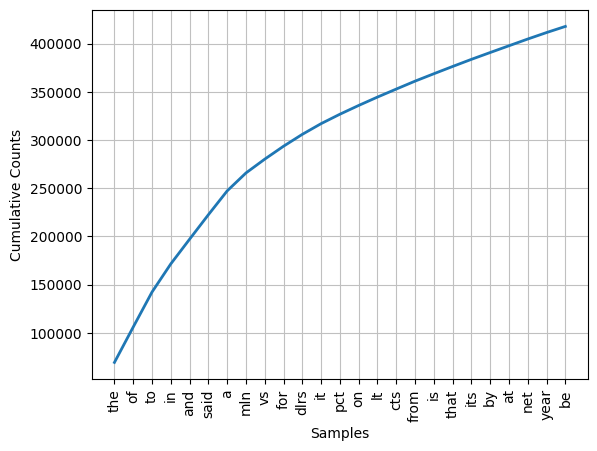

In [45]:
# plot the frequency distribution
fd_1.plot(25, cumulative=True)

What are the most frequent words in terms of document frequency?
Here we are going to count how many documents a word appears in, which is referred to as document frequency.
Instead of writing nested FOR loops to count the document frequency for each word,
we can use  <font color="blue">`FreqDist()`</font> jointly with  <font color="blue">`set()`</font> as follows:
1. Apply  <font color="blue">`set()`</font> to each Reuters article to generate a set of unique words in the article and save all sets in a list
```python
    [set(value) for value in tokenized_reuters.values()]
```
2. Similar to what we have done before, we put all the words in a list using  <font color="blue">`chain.from_iterable`</font> and past
it to  <font color="blue">`FreqDist`</font>.

The first step makes sure that each word in an article appears only once, thus the total number of
times a word appears in all the sets is equal to the number of documents containing that word.

In [46]:
# get the list of all words
words_2 = list(chain.from_iterable([set(value) for value in tokenized_reuters.values()]))
fd_2 = FreqDist(words_2)
# print the 25 most common tokens, 5 each line
for i, word in enumerate(fd_2.most_common(25)):
    print(word, end = '\n' if (i+1) % 5 == 0 else ' ')

('of', 7621) ('the', 6950) ('to', 6911) ('said', 6784) ('and', 6761)
('in', 6580) ('a', 6222) ('lt', 6069) ('for', 5415) ('mln', 4845)
('it', 4788) ('dlrs', 4193) ('from', 4006) ('on', 3987) ('its', 3761)
('is', 3569) ('by', 3511) ('year', 3423) ('at', 3392) ('with', 3253)
('pct', 3212) ('cts', 3068) ('inc', 3023) ('vs', 2982) ('be', 2927)


What you will find is that the majority of the most frequent words according to their document frequecy are still functional words.
Therefore, the next step is to remove all the stopwords.

##### a. Ignoring Stopwords
As discussed in section 1, we often remove function words from the text completely for most text analysis tasks.
Instead of using the built-in stopword list of `NLTK`, we use a much rich stopword list that has been downloaded before.

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stopwords = []
with open('/content/drive/Shareddrives/FIT5196_S2_2025/week5/stopwords_en.txt') as f:
    stopwords = f.read().splitlines()
tokenized_reuters_1 = {}
for fileid in reuters.fileids():
    tokenized_reuters_1[fileid] = [w for w in tokenized_reuters[fileid] if w not in stopwords]

The list comprehension
```python
    [w for w in tokenized_reuters[fileid] if w not in stopwords]
```
says: For each word in each Reuters article, keep the word if the word is not contained in the stopword list.

Checking for membership of a value in a list takes time proportional to the list's length in the average and worst cases.
It causes the above code to run quite slow as we need to do the check for every word in each Reuters article
and the size of the stopword list is large.
However, if you have hashable items, which means both the item order and duplicates are disregarded,
Python `set` is better choice than `list`. The former runs much faster than the latter in terms of searching
a large number of hashable items. Indeed, `set` takes constant time to check the membership.
Let's try converting the stopword list into a stopword set, then search to remove all the stopwords.
Please also note that if you try to perform iteration, `list` is much better than `set`.

In [49]:
uni_stopwords = set(stopwords)
for fileid in reuters.fileids():
    tokenized_reuters[fileid] = [w for w in tokenized_reuters[fileid] if w not in uni_stopwords]

In [ ]:
# check how many stopwords are removed from tokenized_reuters

In [50]:
words_3 = list(chain.from_iterable(tokenized_reuters.values()))
fd_3 = FreqDist(words_3)
print(f"The number of stopwords removed is {len(list(vocab - set(fd_3.keys())))}")

The number of stopwords removed is 481


In the above stopping process, 481 stopwords have been removed from the vocabulary. You might wonder what those removed words are. It is quite easy to check those words by differentiating the vocabulary before and after stopping.

In [ ]:
# print the removed stopwords, every 10 tokens in a new line
for i in range(0, len(list(vocab - set(fd_3.keys()))), 10):
    print(list(vocab - set(fd_3.keys()))[i:i+10])

Beside stopwords, there might some other words that occur quite often as well.

In [ ]:
fd_3.most_common(10)

In [54]:
# get the list of all words
words_4 = list(chain.from_iterable([set(tokenlist) for tokenlist in tokenized_reuters.values()]))
fd_4 = FreqDist(words_4)

In [55]:
fd_4.get('billion')

1687

In [56]:
[v for v,k in fd_4.most_common() if k > len(tokenized_reuters.keys())*0.30]

['lt', 'mln', 'dlrs', 'year']

Before we decide to remove those words from our vocabulary, it might be worth checking what
those words mean and the context of those words. Fortunately `NLTK` provides a `concordance`
function in the `nltk.text` module. A concordance view shows us every occurrence of a given
word, together with the corresponding context. For example,

In [57]:
nltk.Text(reuters.words()).concordance('mln')

Displaying 25 of 18623 matches:
e U . S . Has said it will impose 300 mln dlrs of tariffs on imports of Japanes
. It also said that each year 1 . 575 mln tonnes , or 25 pct , of China ' s fru
it output are left to rot , and 2 . 1 mln tonnes , or up to 30 pct , of its veg
ergy supplies in the year 2000 to 550 mln kilolitres ( kl ) from 600 mln , they
to 550 mln kilolitres ( kl ) from 600 mln , they said . The decision follows th
totalled 9 , 595 tonnes , worth 6 . 9 mln dlrs FOB , plus 184 . 3 mln rupiah fo
rth 6 . 9 mln dlrs FOB , plus 184 . 3 mln rupiah for rubber delivered locally ,
thern Territory at a cost of about 21 mln dlrs . The mine , to be known as the 
umitomo last August agreed to pay 500 mln dlrs for a 12 . 5 pct limited partner
 . It reported a net loss of 976 . 38 mln pesos in the year ending December 198
ld acquire Atlas ' total loans of 275 mln dlrs , to be repaid by the mining com
increase in authorised capital to 175 mln shares from 125 mln at a general meet
ed capit

In [58]:
nltk.Text(reuters.words()).concordance('net')

Displaying 25 of 6989 matches:
ndesbank is effectively withdrawing a net 8 . 1 billion marks from the market w
d world copper prices . It reported a net loss of 976 . 38 mln pesos in the yea
nding December 1986 , compared with a net loss of 1 . 53 billion in 1985 . The 
 U . S .- based bank , said it made a net loss of just over six mln crowns in 1
ng program , reported a 198 mln franc net loss , after 187 mln francs in provis
plant , compared with a 250 mln franc net profit in 1985 . VIEILLE MONTAGNE REP
REPORTS LOSS , DIVIDEND NIL 1986 Year Net loss after exceptional charges 198 ml
on francs vs 20 . 20 billion Proposed net dividend on ordinary shares nil vs 11
ently reported first - half 1986 / 87 net fell to 15 . 02 mln dlrs from 17 . 09
eso sales in 1985 . It said unaudited net profit was in the neighbourhood of 70
id in a statement that parent company net profit last year will rise from the 7
 DSM & lt ; DSMN . AS > said its 1986 net profit rose to 412 mln guilders from 
ARCH INC 

##### b. Remove Less Frequent Words
If the most common words do not benefit the downstream text analysis tasks, except for contributing noises,
how about the words that occur once or twice?
Here another interesting statistic to look at is the frequency of the frequencies of word types in a given corpus.
We would like to see how many words appear only once, how many words appear twice, how many
words appear three times, and so on.

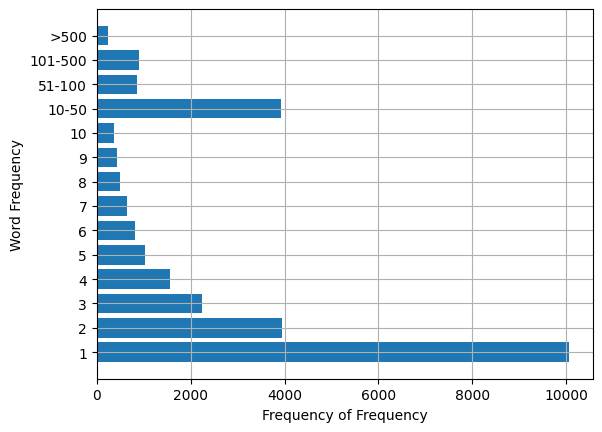

In [59]:
ffd = FreqDist(fd_3.values())
from pylab import *
y = [0]*14
for k, v in ffd.items():
     if k <= 10:
        y[k-1] = v
     elif k >10 and k <= 50:
        y[10] =  y[10] + v
     elif k >50 and k <= 100:
        y[11] =  y[11] + v
     elif k > 100 and k <= 500:
        y[12] =  y[12] + v
     else:
        y[13] =  y[13] + v
x = range(1, 15) # generate integer from 1 to 14
ytks =list(map(str, range(1, 11))) # covert a integer list to a string list
ytks.append('10-50')
ytks.append('51-100')
ytks.append('101-500')
ytks.append('>500')
barh(x,y, align='center')
yticks(x, ytks)
xlabel('Frequency of Frequency')
ylabel('Word Frequency')
grid(True)

The horizontal bar chart generated above shows how many word types occur with a certain frequency.
There are 241 types occurring over 500 times and therefore individually accounting for about 1% of
the vocabulary.
However, on the other extreme, more than one-third of the word types occur only once in the Reuters corpus.
Note that the majority of word types occur quite infrequently given the size of the whole corpus (i.e., 721,371 word tokens):
about 78% of the word types occur 10 times or less.
Similarly, you can also look at the bar chart based on the document frequency. Try it by yourself!

Let's further remove those words that occur only once.
To get those words, you can write the code like
```python
    lessFreqWords = set([k for k, v in fdist.items() if v < 2])
```
or choose to use `hapaxes()` function.

In [60]:
lessFreqWords = set(fd_3.hapaxes())
def removeLessFreqWords(fileid):
    return (fileid, [w for w in tokenized_reuters[fileid] if w not in lessFreqWords])
#pool = mp.Pool(4)
#tokenized_reuters = dict(pool.map(removeLessFreqWords, reuters.fileids()))

In [61]:
tokenized_reuters = dict(removeLessFreqWords(fileid) for fileid in reuters.fileids())

Now, you should have a pretty clean set of Reuters articles, each of which is stored as a list of word tokens.
Let's further print out some statistics that summarize this corpus.

In [62]:
import numpy as np
words = list(chain.from_iterable(tokenized_reuters.values()))
vocab = set(words)
print ("Vocabulary size: ",len(vocab))
print ("Total number of tokens: ", len(words))
print ("Lexical diversity: ", lexical_diversity)
print ("Total number of articles:", len(tokenized_reuters))
lens = [len(value) for value in tokenized_reuters.values()]
print ("Average document length:", np.mean(lens))
print ("Maximun document length:", np.max(lens))
print ("Minimun document length:", np.min(lens))
print ("Standard deviation of document length:", np.std(lens))

Vocabulary size:  17408
Total number of tokens:  712329
Lexical diversity:  45.63796680497925
Total number of articles: 10788
Average document length: 66.0297552836485
Maximun document length: 705
Minimun document length: 0
Standard deviation of document length: 65.84580999696115


It is interesting that the minimun document length is 0. There must be some Reuters articles that are extremely short,
after tokenization and stopping, there are no words left. Can you check those documents to see what they look like?

### 2.2. Building Vector Representation

After text pre-processing has been completed, each individual document needs to be transformed into
some kind of numeric representation that can be input into most NLP and text mining algorithms.
For example, classification algorithms, such as Support Vector Machine, can only take data in a
structured and numerical form. They do not accept free languge text.
The most popular structured representation of text is the vector-space model, which represents text
as a vector where the elements of the vector indicate the occurence of words within the text.
The vector-space model makes an implicit assumption that
the order of words in a text document are not as
important as words themselves, and thus disregarded.
This assumpiton is called [**Bag-of-words**](https://en.wikipedia.org/wiki/Bag-of-words_model).

Given a set of documents and a pre-defined list of words appearing
in those documents (i.e., a vocabulary), you can compute a vector representation for each document.
This vector representation can take one of the following three forms:
* a binary representation,
* an integer count,
* and a float-valued weighted vector.

To highlight the difference among the three approaches, we use a very simple example as follows:
```
    document_1: "Data analysis is important."
    document_2: "Data wrangling is as important as data analysis."
    document_3: "Data science contains data analysis and data wrangling."
```
The three documents contain 20 tokens and 9 unique words.
Those unique words are sorted alphabetically with total counts:
```
     'analysis': 3,
     'and': 1,
     'as': 2,
     'contains': 1,
     'data': 6,
     'important': 2,
     'is': 2,
     'science': 1,
     'wrangling': 2
```
Given the vocabulary above,
both the binary and the integer count vectors are easy to compute.
A binary vector stores 1s for the word that appears in a document and 0s for the other words in
the vocabulary,
whereas a count vector stores the frequency of each word appearing in the document.
Thus, the binary vector representations for the three documents above are
   
   ||'analysis'|'and'|'as'|'contains'|'data'|'important'|'is'|'science'|'wrangling'|
   |-|-|-|-|-|-|-|-|-|
   |document 1:|1|0|0|0|1|1|1|0|0|
   |document 2:|1|0|1|0|1|1|1|0|1|
   |document 3:|1|1|0|1|1|0|0|1|1|

The count vector representations for the same documents would look as follows:

   ||'analysis'|'and'|'as'|'contains'|'data'|'important'|'is'|'science'|'wrangling'|
   |-|-|-|-|-|-|-|-|-|
   |document 1:|1|0|0|0|1|1|1|0|0|
   |document 2:|1|0|2|0|2|1|1|0|1|
   |document 3:|1|1|0|1|3|0|0|1|1|

Instead of using the two vector representations above,
most existing text analysis algorithms, like document classification and information retrieval,
prefer representing documents as weighted vectors.
The raw term frequency is often replaced with a weighted term frequency
that indicates how important a word is in a particular document.
There are many different term weighting schemes online.
To store each document as a weighted vector, we first need to choose a weighting scheme.
The most popular scheme is the TF-IDF weighting approach.
TF-IDF stands for term frequency-inverse document frequency.
The term frequency for a word is the number of times the word appears in a document.
In the preceding example, the term frequency in Document 2 for “data” is 2, since it appears twice in the document. Document frequency for a word is the number of documents that contain the word;
it would also be 3 for “data” in the collection of the three preceding documents.
The Wikipidia entry on [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) lists
a number of variants of TF-IDF.
One variant is reproduced here
$$tf\cdot idf(w,d) = tf(w, d) * idf(w)$$

where

$$tf(w,d)\,=\, \sum_{i}^{|d|} 1_{w = w_{d,i}}$$
and
$$idf(w) = log\left(\frac{|D|}{|d \in D: w \in d |}\right)$$

The assumption behind TF-IDF is that words with high term frequency should receive high weight unless they also have high document frequency.
Stopwords are the most commonly occurring words in the English language. They often occur many times within a single document, but they also occur in nearly every document.
These two competing effects cancel out to give them low weights,
as those very common words carry very little meaningful information about the actual contents of the document.
Therefore, the TF-IDF weights for stopwords are almost always 0.
With the TF-DF formulas above,
the weighted vector representations for the example documents are computed as

||'analysis'|'and'|'as'|'contains'|'data'|'important'|'is'|'science'|'wrangling'|
   |-|-|-|-|-|-|-|-|-|
   |document 1:|0|0|0|0|0|0.176|0.176|0|0|
   |document 2:|0|0|0.954|0|0|0.176|0.176|0|0.176|
   |document 3:|0|0.477|0|0.477|0|0|0|0.477|0.176|

Given the cleaned up Reuters documents, how can we generate those vectors for each documents?
Unfortunately, NLTK does not implement methods that directly produce those vectors.
Therefore, we will either write our own code to compute them or appeal to other data analysis libraries.
Here we are going to use [scikit-learn](http://scikit-learn.org/stable/index.html), an open source machine
learning library for Python.
If you use Anaconda, you should already have scikit-learn installed, otherwise you will need to
[install it](http://scikit-learn.org/stable/install.html) by following the instruction on its official website.

Although scikit-learn features various classification, regression and clustering algorithms
we are particularly interested in its feature extraction module, [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction).
This module is often used to "extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image." Please refer to its documentation on text feature extraction,
section 4.2.3 of [Feature Extraction](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). We will demonstrate the usage of the following two classes:
* [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer): It converts a collection of text documents to a matrix of token counts.
* [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer):
It converts a collection of raw documents to a matrix of TF-IDF features.

#### 2.2.1 Creating Count Vectors
Let's start with generating the count vector representation for each Reuters document.
Initialise the "CountVector" object: since we have pre-processed all the Reuters documents,
the parameters, "tokenizer", "preprocessor" and "stop_words" are set to their default value, i.e., None.

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word")

Next, transform Reuters articles into feature vectors. `fit_transform` does two things: First, it fits the model and learns the vocabulary; second it transforms the text data into feature vectors.
Please note the input to `fit_transform` should be a list of strings.
Since we have stored each tokenised article as a list of words, we concatenate all the words in the list and separate
them with white spaces.
The following code will do that:
```python
[' '.join(value) for value in tokenized_reuters.values()]
```
Then, we input this list of strings into `fit_transform`,

In [64]:
data_features = vectorizer.fit_transform([' '.join(value) for value in tokenized_reuters.values()])
print (data_features.shape)

(10788, 17408)


The shape of document-by-word matrix should be 10788 * 17403.
However, in order to save such a matrix in memory but also to speed up algebraic operations on the matrix,
scikit-learn implements matrix/vector in a sparse representation.
Let's check the count vector for the first article, i.e., 'training/1684'.

In [65]:
# vocab2 = vectorizer.get_feature_names()
vocab2 = vectorizer.get_feature_names_out()
for word, count in zip(vocab, data_features.toarray()[0]):
    if count > 0:
        print (word, ":", count)

barry : 1
appeal : 1
korkman : 1
await : 2
committees : 1
fostering : 1
jobless : 1
allowance : 1
grease : 2
taher : 1
diversity : 1
yaik : 2
anita : 1
pickup : 1
cotton : 1
aluminium : 1
feeding : 1
protected : 1
petroleos : 5
dls : 1
gilts : 2
faction : 1
republicans : 1
worse : 1
eep : 4
gazeta : 2
land : 1
signup : 1
ideologically : 1
upturn : 1
pursuit : 1
morse : 1
mtech : 1
empty : 1
nge : 1
stowed : 1
official : 1
volcker : 1
exporting : 1
zimbabwean : 1
thermo : 1
muskogee : 1
westpac : 2
cede : 1
onward : 2
dalton : 1
flexibility : 2
heimat : 1
interrupt : 1
voluntary : 1
milex : 2
numerous : 1
canned : 1
regency : 1
formally : 2
recall : 6
ibrahim : 1
englebright : 1
adm : 2
cairns : 2
sown : 1
semi : 1
tyres : 4
regulated : 1
brnf : 1
goodrich : 1
fewer : 1
fragmented : 1
usage : 1
privileged : 1
markey : 3
atco : 1
britannia : 6
med : 1
warranted : 1
considerations : 1
touched : 1
global : 1
iel : 1
krutikhin : 1
contrary : 1
viner : 1
honduras : 1
importance : 1
sjt : 1
d

Another way to get the count list above is to use `FreqDist`.

In [66]:
FreqDist(tokenized_reuters['training/1684'])

FreqDist({'erc': 5, 'partnership': 4, 'shares': 3, 'stake': 2, 'international': 2, 'parsow': 2, 'investment': 2, 'pct': 2, 'common': 2, 'stock': 2, ...})

Note that the vocabulary you just got with `vectorizer.get_feature_names()` or `vectorizer.get_feature_names_out()`  shoud be exactly the same as above.

In [67]:
list(vocab-set(vocab2))

[]

#### 2.2.2 Creating TF-IDF Vectors
Similar to the use of `CountVector`, we first initialise a `TfidfVectorizer` object by only specifying
the value of "analyzer", and then covert the Reuters data into a list of strings, each of which corresponds
to a Reuters articles.

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = "word")
tfs = tfidf.fit_transform([' '.join(value) for value in tokenized_reuters.values()])
tfs.shape

(10788, 17408)

In [69]:
# vocab = vectorizer.get_feature_names()
vocab = vectorizer.get_feature_names_out()
for word, weight in zip(vocab, tfs.toarray()[0]):
    if weight > 0:
        print (word, ":", weight)

accounting : 0.03824380547132344
action : 0.030610220218964906
advantage : 0.04392411496013759
alleged : 0.08927471732522489
american : 0.027677085531154454
analyst : 0.03472473724338243
april : 0.020866650380173362
asia : 0.04365822325459151
asian : 0.08812199459067033
asked : 0.030570833605031753
association : 0.031404654310321495
australia : 0.07293404873879264
australian : 0.037043385736673595
awaiting : 0.04885226076212608
aware : 0.04595799589769544
barriers : 0.043529017024617124
beef : 0.04203796774468898
biggest : 0.03992164056026284
billion : 0.09867294201265053
block : 0.040726307565469196
boost : 0.06988607911167637
broker : 0.04595799589769544
budget : 0.033247064776165465
business : 0.026613390843530576
businessmen : 0.18106474320049826
button : 0.13262187160486735
call : 0.03679736930639484
canberra : 0.06350822634328575
capel : 0.050749259364486356
capitals : 0.05672840886885183
centred : 0.0559142534173469
chairman : 0.027047696666605902
chief : 0.03296373281652167
coa

So now we have converted all the Reuters articles into feature vectors.
We can use those vectors to, for example,
* compute the similarity between two articles,
* search articles for a given query
* do other advance text analysis, such as document classification and clustering.

Assume that we have a new document, how can we get its TF-IDF vector.
We do this by using the transform function as follows.
We have randomly chosen a sentence from
[a recent Reuters news](http://www.reuters.com/article/us-usa-election-idUSKCN0W346T).

In [70]:
str = """
the former secretary of state hoped to win enough states to take a big step toward wrapping up her nomination fight
with a democratic senator from Vermont.
"""
response = tfidf.transform([str])
for col in response.nonzero()[1]:
    print (vocab[col], ' - ', response[0, col])

big  -  0.25208797149625073
democratic  -  0.2923827260361501
fight  -  0.3013361833184753
hoped  -  0.2667921738023468
nomination  -  0.3913854194683875
secretary  -  0.20108220692083675
senator  -  0.32524218850047387
state  -  0.18714392191939005
states  -  0.17542767104552628
step  -  0.25697922435891357
vermont  -  0.4040365116291299
win  -  0.3074114755647501


Note that the text above is not included in the trained TF-IDF model with the 'transform' function, unless the `fit_transform` function is called,

Both `CountVectorizer` and `TfidfVectorizer` come with their own options to automatically do pre-processing, tokenization, and stop word removal -- for each of these, instead of using their default value (i.e., None),
we could customise the two vectorizer classes by either using a built-in method or specifying our own function.
See the function documentation for more details.
However, we wanted to write our own function for clean the text data in this chapter to show you how
it's done step by step.

Let's print out the weighted vector for the first document.

### 2.3. Saving Pre-processed Text to a File

The pre-processed text needs to be saved in a proper format so that it can be easily used by the downstream analysis algorithm. There are a couple of ways of dumping the pre-processed text data into txt files.
For example, use one txt file to store the tokenized documents. The tokens in a document are stored in one row in the txt file, and are separated with a given delimiter, e.g., whitespace. In this case, the downstream text analyser needs to re-construct the vocabulary.

In [71]:
out_file = open("./reuters_1.txt", 'w')
for d in tokenized_reuters.values():
    out_file.write(' '.join(d) + '\n')
out_file.close()

You can also save vocabulary in a separate file, and assign a fixed integer id to each word in the vocabulary. What text analysers usually do is to use the index of each word in the vocabulary as its integer id.
Given the vocabulary, each document can be represented as a sequence of integers that correspond to the tokens,
or in the following sparse form:
```
    word_index:word count
```
for example,

In [72]:
out_file = open("./reuters_2.txt", 'w')
vocab = list(vocab)
vocab_dict = {}
i = 0
for w in vocab:
    vocab_dict[w] = i
    i = i + 1
for d in tokenized_reuters.values():
    d_idx = [vocab_dict[w] for w in d]
    for k, v in FreqDist(d_idx).items():
        out_file.write("{}:{} ".format(k,v))
    out_file.write('\n')
out_file.close()

### 2.4. Extracting Other Features

It is common for most text analysis tasks to treat documents as bags-of-words, which can significantly simplify the inference procedure of text analysis algorithms.
However, things always have pros and cons.
The bag-of-words representation loses lots of information encoded in either syntax or word order (i.e., dependencies between adjacent words in sentences.).
For example, representing a document as a collection of unigrams effectively disregards any word order dependence,
which fails to capture phrases and multi-word expressions. A similar issue has been mentioned in section 2.1. of Chapter 2.
In this section, we are going to show you how to
* use Part-of-Speeching (POS) tagging to extract specific word groups, such as all nouns, verbs, etc.,
* extract n-grams,
*  and extract collocations

These features can be further used to enrich the representation of a document.

#### 2.4.1 Extracting Nouns and Verbs

It is easy for human to tell the difference between nouns, verbs,
adjectives and adverbs, as we have learnt them back in elementary school.
However, how can we automatically classify words into their parts of speech (i.e., lexical categories or word classes)
and label them accordingly with computer program?
This section is not going to discuss how to determine the category of a word from a linguistic perspective.
Instead it demonstrates the use of some existing POS taggers to extract words in a specific lexical category.
It has been proven that words together with their part-of-speech (POS) are quite useful for many language processing tasks.

In NLP, the process of labelling words with their corresponding part-of-speech (POS) tags is known as [POS tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging).
A POS tagger processes a sequence of words and attaches a POS tag to each word based on both its definition and its context. There are many POS taggers available online, such as [Sandford POS tagger](http://nlp.stanford.edu/software/tagger.shtml).
We are going to use the one implemented by NLTK.

In [73]:
# nltk.download('averaged_perceptron_tagger') download the tagger if you haven't
example_sent = 'A POS tagger processes a sequence of words and attaches a POS tag to each \
word based on both its definition and its context'
text = nltk.word_tokenize(example_sent)
tagged_sent = nltk.tag.pos_tag(text)
# print the tagged sentence, every 5 tokens in a new line
for i in range(0, len(tagged_sent), 5):
    print(tagged_sent[i:i+5])

[('A', 'DT'), ('POS', 'NNP'), ('tagger', 'NN'), ('processes', 'VBZ'), ('a', 'DT')]
[('sequence', 'NN'), ('of', 'IN'), ('words', 'NNS'), ('and', 'CC'), ('attaches', 'VBZ')]
[('a', 'DT'), ('POS', 'NNP'), ('tag', 'NN'), ('to', 'TO'), ('each', 'DT')]
[('word', 'NN'), ('based', 'VBN'), ('on', 'IN'), ('both', 'DT'), ('its', 'PRP$')]
[('definition', 'NN'), ('and', 'CC'), ('its', 'PRP$'), ('context', 'NN')]


If you are seeing these tags for the first time, you will wonder what these tags mean.
You can find the specification of all the tags [here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).
NLTK provides documentation for each tag, which can be queried using the tag, e.g.,

In [74]:
# nltk.download('tagsets') download the tagsets if you haven't
print (nltk.help.upenn_tagset('NNP'))
print (nltk.help.upenn_tagset('IN'))
print (nltk.help.upenn_tagset('PRP$'))

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
None
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
None
PRP$: pronoun, possessive
    her his mine my our ours their thy your
None


The example sentence has been processed by `pos_tag` into a list of tuples, each of which is a pair of a word and its POS tag. We see that 'a' is 'DT', a determiner; 'its' is 'PRP$', a possessive pronoun; 'and' is 'CC', a coordinating conjunction, 'words' is 'NNS', a noun in the plural form, and so on. Note that several of the corpora included in NLTK have been tagged for their POS. Please click [here](http://www.nltk.org/howto/corpus.html#tagged-corpora) to see how to access those tagged corpora.
Here is an example of using the `tagged_words` function to retrieve all words in Brown corpus with their tags.

`nltk.download('brown')` is a module that provides a number of corpora, including the Brown corpus. The following code shows how to use the `brown` corpus to load the Brown articles.

In [75]:
nltk.download('brown')
nltk.corpus.brown.tagged_words()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

Please note that the collection of tags is known as a tag set.
There are many different conventions for tagging words.
Therefore, tag sets can vary among different tasks.
What we used above is the Penn Treebank tag set.
Let's change the tag set to the Universal POS tag set, and print the Brown corpus again.
You will find different tags are used.

`nltk.download('universal_tagset')` is a module that provides a number of tagsets. In this tutorial, we are going to use the `universal_tagset` to get the meaning of each tag.

In [76]:
nltk.download('universal_tagset')
nltk.corpus.brown.tagged_words(tagset='universal')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


[('The', 'DET'), ('Fulton', 'NOUN'), ...]

If you would like to learn more about POS tagging, please refer to [1].

Given the tagged text, you can easily identify all the nouns, verbs, etc.
Nouns generally refer to people, places, things, or concepts, e.g., Monash, Melbourne, university, data, and science.
Nouns can appear after determiners and adjectives, and can be the subject or object of the verb.
Now how can we extract all the nouns from a text?
Assume we use the Penn Treebank tag set.
Here are all the tags for nouns:
```
    NN    Noun, singular or mass
    NNS   Noun, plural
    NNP   Proper noun, singular
    NNPS  Proper noun, plural
```
It is not hard to see all the tags above start with 'NN'.
Thus, we can iterate over all the words and check if their tag string starts with 'NN'.

In [77]:
all_nouns = [w for w,t in tagged_sent if t.startswith('NN')]
all_nouns

['POS',
 'tagger',
 'sequence',
 'words',
 'POS',
 'tag',
 'word',
 'definition',
 'context']

Similarly, you will find that all the verb tags start with 'VB', see
```
    VB	Verb, base form
    VBD   Verb, past tense
    VBG   Verb, gerund or present participle
    VBN   Verb, past participle
    VBP   Verb, non-3rd person singular present
    VBZ   Verb, 3rd person singular present
```
Thus,

In [78]:
all_verbs = [w for w,t in tagged_sent if t.startswith('VB')]
all_verbs

['processes', 'attaches', 'based']

Unfortunately, the Reuters corpus that we have been using, has no built-in POS tags. But you can get sentences from Reuters corpus, and then you can get the POS tags.

#### 2.4.2 Extracting N-grams and Collocations

Besides unigrams that we have been working on so far,
N-grams of texts are also extensively used in various text analysis tasks.
They are basically contiguous sequences of `n` words from a given sequence of text.
When computing the n-grams you typically move a fixed size window of size n
words forward.
For example, for the sentence
"Laughter is like a windshield wiper."
if N = 2 (known as bigrams), the n-grams would be:
```
    Laughter is
    is like
    like a
    a windshield
    windshield wiper
```
So you have 5 bigrams in this case. Notice that the generative process above
essentially moves one word forward to generate the next bigram.
If N = 3 (known as trigrams), the n-grams would be:
```
    Laughter is like
    is like a
    like a  windshield
    a  windshield wiper
```
What are N-grams used for? They can be used to build n-gram language model that
can be further used for speech recognition, spelling correction, entity detection, etc.
In terms of text mining tasks, n-grams is used for developing features for
classification algorithms, such as SVMs, MaxEnt models, Naive Bayes, etc.
The idea is to expand the unigram feature space with n-grams.
But please notice that
the use of bigrams and trigrams in your feature space may not necessarily yield significant performance
improvement. The only way to know this is to try it!
Extracting from a text a list of n-gram can be easily accomplished with function `ngram()`:

In [79]:
from nltk.util import ngrams
bigrams = ngrams(reuters.words(), n = 2)
fdbigram = FreqDist(bigrams)

In [80]:
fdbigram.most_common()

[((',', '000'), 10266),
 (("'", 's'), 9220),
 (('lt', ';'), 8693),
 (('&', 'lt'), 8688),
 (('.', 'The'), 8530),
 (('said', '.'), 7888),
 (('of', 'the'), 6803),
 (('in', 'the'), 6487),
 (('U', '.'), 6350),
 (('.', 'S'), 5833),
 (('S', '.'), 5459),
 (('1', '.'), 4414),
 ((',', 'the'), 4296),
 (('mln', 'dlrs'), 4192),
 (('said', 'it'), 4003),
 (('mln', 'vs'), 3916),
 (('said', 'the'), 3604),
 (('.', '"'), 3512),
 (('cts', 'vs'), 3209),
 (('.', '5'), 2779),
 (('for', 'the'), 2665),
 (('000', 'vs'), 2578),
 (('to', 'the'), 2465),
 (('1', ','), 2425),
 (('2', '.'), 2375),
 (('cts', 'Net'), 2179),
 (('.', '2'), 1983),
 (('the', 'U'), 1959),
 (('the', 'company'), 1941),
 (('.', '1'), 1924),
 (('on', 'the'), 1907),
 ((',', 'which'), 1896),
 (('.', '3'), 1841),
 ((',', 'and'), 1828),
 (('.', '4'), 1815),
 (('.', '6'), 1798),
 (('.', '8'), 1789),
 (('vs', 'loss'), 1746),
 (('.', '9'), 1726),
 (('.', '7'), 1719),
 (('.', 'It'), 1707),
 (('3', '.'), 1667),
 (('he', 'said'), 1633),
 (('will', 'be'),

Collocations are expressions of multiple words that commonly co-occur.

>Finding collocations requires first calculating the frequencies of words and
their appearance in the context of other words. Often the collection of words
will then requiring filtering to only retain useful content terms. Each ngram
of words may then be scored according to some association measure, in order
to determine the relative likelihood of each ngram being a collocation. (Quoted from [here](http://www.nltk.org/_modules/nltk/collocations.html))

For example, to extract bigram collocations, we can firstly extract bigrams then get the commonly co-occurring ones by ranking the bigrams by some measures. A commonly used measure is [Pointwise Mutual Information](https://en.wikipedia.org/wiki/Pointwise_mutual_information) (PMI). The following code will find the best 100 bigrams using the PMI scores.

In [81]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(reuters.words())
finder.nbest(bigram_measures.pmi, 50)

[('...............', 'MAX'),
 ('11895', '2289'),
 ('11TH', 'LICENCE'),
 ('12664', '11895'),
 ('2867', '2073'),
 ('3198', '2867'),
 ('35000', '32876'),
 ('6000', 'QMS'),
 ('6834', '2292'),
 ('7289', '6834'),
 ('8440', '1409'),
 ('9009', '8440'),
 (';(', 'MWW'),
 ('ACUIRES', 'SUPERMAC'),
 ('ADELAIDE', 'STEAMSHIP'),
 ('ADVENTURE', 'Americanture'),
 ('ARMISTICE', 'ELUDES'),
 ('ARTICLES', 'HALLMARKED'),
 ('ARTILLERY', 'SHELLS'),
 ('ASPEN', 'RIBBONS'),
 ('ASSUMPTIONS', 'FLAWED'),
 ('AUTOCLAVE', 'ENGINEERS'),
 ('AVIAN', 'INFLUENZA'),
 ('Acquired', 'Immune'),
 ('Addis', 'Ababa'),
 ('Addressograph', 'Farrington'),
 ('Adventist', 'Church'),
 ('Afobaka', 'dam'),
 ('Aggregate', 'judgments'),
 ('Aghia', 'Efthymia'),
 ('Ahmad', 'Sarji'),
 ('Alfieri', 'Maserati'),
 ('Allgemeine', 'Hypothekenbank'),
 ('Almy', 'Hafild'),
 ('Alois', 'Schwietert'),
 ('Alsthom', 'Inudstrial'),
 ('Anders', 'Carlberg'),
 ('Anno', '1720'),
 ('Anwar', 'Sadat'),
 ('Aproveitamentos', 'Florestais'),
 ('Arie', 'Guldemond'),
 ('Ar

The `collocations` module implements a number of measures to score collocations or other associations.
They include Student's t test, Chi-Square, likelihood ratios, PMI and so on.
Here we used PMI scores for finding bigrams.
Please read [2] for a detailed tutorial on finding collocations with NLTK.
If you would like to know more about collocations, please refer to [3].

### 2.5. Conclusion
This section has show you how to
* generate vocabulary be further exploring the tokenized text with some simple statistics.
* convert unstructured text to structured form using the bag-of-words model
* compute TF-IDF
* extract words in specific lexical categories, n-grams and collocations.

In summary
- In section 2.1, we have shown you how to count the vocabulary by selecting tokens of interest.
- In section 2.2, we have demonstrated how to count the vocabulary and generate the sparse format data.
- In section 2.3, we have shown you how to save pre-processed text to a file.
- In section 2.4, we have demonstrated how to extract other features.

### 2.6. Reference Reading Materials
1. "[Categorizaing and Tagging Words](http://www.nltk.org/book/ch05.html)",
Chapter 5 of "Natural Language Processing with Python".
2. "[Collocations](http://www.nltk.org/howto/collocations.html)": An NTLK tutorial on how to extract collocations 📖 .
3. "[Collocations](http://nlp.stanford.edu/fsnlp/promo/colloc.pdf)": An introduction to collocation by Manning and Schutze.

## **3. XML Data**

We have shown you how to process text data in the previous sections. In this section, we are going to show you how to process a set of patents documents stored in XML format and generating the sparse representations for those patents. The final output file should be exactly the same as the one stored in "patents.txt".

In order to finish this task, you should
1. Exatract the abstract and claims for each patent from its xml file. Use Beautiful soup
2. Tokenise the patents
3. Generate 100 bigram collocations
4. Re-tokenize the patents with those bigram collocations
5. Generate the TF-IDF vectors for those re-tokenized patents
6. save the vectors in the form shown in "patents.txt"

### 3.1 Import libraries
Here we will focus on using the existing packages as possible as we can.

`bs4` is a module that helps to extract information from an XML file. The following code shows how to use the `bs4` module to load the XML file.
`BeautifulSoup` is a class that helps to parse the XML file.

In [82]:
from bs4 import BeautifulSoup as bsoup
import re
import os
import nltk
from nltk.collocations import *
from itertools import chain
import itertools
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import MWETokenizer

### 3.2 Exatract Patent's abstract and Claims

The first task is to parse each patent stored in the "xml_files" folder. The information to be extracted includes
1. patent document number (doc-number) stored in "publication-reference"
2. patent's abstract
3. patent's claims

Hint: you can use a dictionary to save patents, where the key is the doc-number, the value is a long string contains both abstracts and all claims.

In [83]:
def parsing(t):

    xmlSoup = bsoup(t,"lxml-xml")

    pid = xmlSoup.find("publication-reference").find('doc-number').string

    text = ""

    #Extract text in "abstract"
    abt = xmlSoup.find('abstract')
    for p in abt.findAll('p'):
        text = text + p.text + " "

    #Extract Claims
    for tag in xmlSoup.find_all('claim-text'):
        text = text + tag.text

    return (pid, text)

In [85]:
# !pip install lxml

In [ ]:
xml_file_path = "/content/drive/Shareddrives/FIT5196_S2_2025/week5/xml_files"
patents_raw = {}
# read all the XML files in the xml_file_path
for xfile in os.listdir(xml_file_path):
    xfile = os.path.join(xml_file_path, xfile)
    print(xfile)
    if os.path.isfile(xfile) and xfile.endswith('.XML'):
        (pid, text) = parsing(open(xfile))
        patents_raw[pid] = text

/content/drive/Shareddrives/FIT5196_S1_2025/week5/xml_files/Icon_
/content/drive/Shareddrives/FIT5196_S1_2025/week5/xml_files/US07891177-20110222.XML


<ipython-input-83-53f9a3994fd9>:11: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  for p in abt.findAll('p'):


/content/drive/Shareddrives/FIT5196_S1_2025/week5/xml_files/US07891027-20110222.XML
/content/drive/Shareddrives/FIT5196_S1_2025/week5/xml_files/US07891221-20110222.XML
/content/drive/Shareddrives/FIT5196_S1_2025/week5/xml_files/US07891266-20110222.XML
/content/drive/Shareddrives/FIT5196_S1_2025/week5/xml_files/US07891262-20110222.XML
/content/drive/Shareddrives/FIT5196_S1_2025/week5/xml_files/US07891140-20110222.XML
/content/drive/Shareddrives/FIT5196_S1_2025/week5/xml_files/US07891121-20110222.XML
/content/drive/Shareddrives/FIT5196_S1_2025/week5/xml_files/US07891165-20110222.XML
/content/drive/Shareddrives/FIT5196_S1_2025/week5/xml_files/US07891057-20110222.XML
/content/drive/Shareddrives/FIT5196_S1_2025/week5/xml_files/US07891271-20110222.XML
/content/drive/Shareddrives/FIT5196_S1_2025/week5/xml_files/US07891071-20110222.XML
/content/drive/Shareddrives/FIT5196_S1_2025/week5/xml_files/US07891166-20110222.XML
/content/drive/Shareddrives/FIT5196_S1_2025/week5/xml_files/US07891076-20110

In [87]:
patents_raw.keys()

dict_keys(['07891177', '07891027', '07891221', '07891266', '07891262', '07891140', '07891121', '07891165', '07891057', '07891271', '07891071', '07891166', '07891076', '07891084', '07891097', '07891206', '07891148', '07891104', '07891019', '07891173', '07891070', '07891268', '07891248', '07891098', '07891231', '07891210', '07891141', '07891044', '07891273', '07891083', '07891037', '07891163', '07891055', '07891162', '07891029', '07891087', '07891058', '07891118', '07891252', '07891107', '07891178', '07891039', '07891117', '07891067', '07891020', '07891032', '07891188', '07891199', '07891078', '07891158', '07891053', '07891139', '07891021', '07891116', '07891234', '07891018', '07891272', '07891056', '07891255', '07891198', '07891033', '07891160', '07891169', '07891123', '07891146', '07891063', '07891170', '07891030', '07891239', '07891082', '07891025', '07891115', '07891242', '07891026', '07891152', '07891036', '07891114', '07891159', '07891192', '07891183', '07891167', '07891259', '0789

In [88]:
patents_raw['07891027']

'A seal assembly for a drain vent is provided to direct the pressure exerted by a plunger to the face of a drain clog rather than escaping through the drain vent. The seal assembly of the invention comprises a tubular body having a first closed end and a second open end to define a substantially rigid a cup-like structure or cavity. A sealing member concentric with a longitudinal axis of the tubular body is attached to the second open end of the tubular body to form a seal against a surface containing the drain vent. A handle is attached to the closed end of the cup-like structure and extends away from the closed first end of the tubular body to provide a mechanism for the user to hold the sealing member against the surface containing the drain vent during the plunging process. 1. A seal for a drain vent, comprising: a tubular body having a first closed end and a second open end for forming a rigid cavity within said tubular body; a sealing member concentric with a longitudinal axis of

### 3.3 Tokenize the patents
After finish extract the texts, you now need to tokenize the patents with regular expression tokenizer implemented in NLTK.

In [89]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]{2,}')

In [90]:
def tokenizePatent(pid):
    """
        the tokenization function is used to tokenize each patent.
        The one argument is patent_id.
        First, normalize the case.
        Then, use the regular expression tokenizer to tokenize the patent with the specified id
    """
    raw_patent = patents_raw[pid].lower()
    tokenized_patents = tokenizer.tokenize(raw_patent)
    return (pid, tokenized_patents) # return a tupel of patent_id and a list of tokens

In [91]:
patents_tokenized = dict(tokenizePatent(pid) for pid in patents_raw.keys())

### 3.4.  Generate the 100 bigram collocations
The next task is go generate the bigram collocations, given the tokenized patents.

The first step is to concatenate all the tokenized patents using the chain.frome_iterable function. The returned list
by the function contains a list of all the words seprated by while space.

In [92]:
all_words = list(chain.from_iterable(patents_tokenized.values()))

The second step is to generate the 100 bigram cllocations. The functions you need include
* BigramAssocMeasures()
* BigramCollocationFinder.from_words()
* apply_freq_filter(20)
* apply_word_filter(lambda w: len(w) < 3)
* nbest(bigram_measures.pmi, 100)

Please do not change the parameters given in the last three function. More information about generating collocation with NLTK can be found http://www.nltk.org/howto/collocations.html.

In [93]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = nltk.collocations.BigramCollocationFinder.from_words(all_words)
bigram_finder.apply_freq_filter(20)
bigram_finder.apply_word_filter(lambda w: len(w) < 3)# or w.lower() in ignored_words)
top_100_bigrams = bigram_finder.nbest(bigram_measures.pmi, 100) # Top-100 bigrams
top_100_bigrams

[('harmonic', 'flex'),
 ('centrifugally', 'balanced'),
 ('robotic', 'harmonic'),
 ('expandable', 'chuck'),
 ('group', 'consisting'),
 ('charge', 'consistent'),
 ('walk', 'behind'),
 ('improperly', 'swapped'),
 ('saw', 'resonator'),
 ('behind', 'mowing'),
 ('jute', 'fibers'),
 ('actuator', 'flag'),
 ('elastic', 'band'),
 ('drain', 'vent'),
 ('lead', 'frames'),
 ('fresh', 'food'),
 ('high', 'humidity'),
 ('paper', 'particles'),
 ('fringe', 'maker'),
 ('ultrasonic', 'test'),
 ('foot', 'pedal'),
 ('elastomeric', 'mat'),
 ('capacitor', 'devices'),
 ('loaded', 'bag'),
 ('hammermilled', 'straw'),
 ('flash', 'tank'),
 ('tank', 'receiver'),
 ('hip', 'joint'),
 ('does', 'not'),
 ('duty', 'belt'),
 ('drier', 'solid'),
 ('solid', 'phase'),
 ('removable', 'joining'),
 ('cooler', 'box'),
 ('not', 'exceed'),
 ('cross', 'sectional'),
 ('case', 'packer'),
 ('vacuum', 'electronic'),
 ('driver', 'pulley'),
 ('mowing', 'machine'),
 ('fastened', 'together'),
 ('storage', 'capacity'),
 ('bus', 'bars'),
 ('p

### 3.5 Re-tokenize the patents again.

Task in Section 4 takenise the patents with only unigrams. Now, we introduce 100 collcations. we need to make sure those collocations are not split into two individual words. The tokenizer that you need is <a href="http://www.nltk.org/api/nltk.tokenize.html">MWEtokenizer</a>.


In [94]:
mwetokenizer = MWETokenizer(top_100_bigrams)
colloc_patents =  dict((pid, mwetokenizer.tokenize(patent)) for pid,patent in patents_tokenized.items())
all_words_colloc = list(chain.from_iterable(colloc_patents.values()))
colloc_voc = list(set(all_words_colloc))
print(len(colloc_voc))

3372


You can check the difference between th output of MWEtokenizer and RegexpTokenizer by <font size=3>adpating</font> the following code:

```python
for pid in patents_tokenized.keys():
    diff = set(colloc_patents[pid])-set(patents_tokenized[pid])
    if len(diff) != 0:
        print (pid, diff)
```

### 3.6 Generate the TF-IDF vectors for all the patents.
Please refer to
* http://scikit-learn.org/stable/modules/feature_extraction.html
* http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [95]:
pids = []
patent_words = []
for pid, tokens in colloc_patents.items():
    pids.append(pid)
    txt = ' '.join(tokens)
    patent_words.append(txt)

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(input = 'content', analyzer = 'word')
tfidf_vectors = tfidf_vectorizer.fit_transform(patent_words)
tfidf_vectors.shape

(100, 3372)

### 3.7 Save the TF-IDF vector into the specified format
Hint: you can use
* the <a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csc_matrix.tocoo.html">tocoo()</a> function
* itertools.zip_longest()

In [97]:
save_file = open("patent_student.txt", 'w')
vocab = tfidf_vectorizer.get_feature_names_out()
#########please write the missing code below#######
cx = tfidf_vectors.tocoo() # return the coordinate representation of a sparse matrix
for i,j,v in itertools.zip_longest(cx.row, cx.col, cx.data):
  save_file.write(pids[i] + ',' + vocab[j] + ',' + format(v) + '\n')
save_file.close()